In [36]:
import pandas as pd

In [37]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [38]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [39]:
diabetes.describe()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,33.240885,0.348958
std,3.369578,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,24.000000,0.000000
50%,3.000000,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,29.000000,0.000000
75%,6.000000,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,41.000000,1.000000
max,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,81.000000,1.000000


In [40]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [41]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [42]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [43]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [44]:
import tensorflow as tf

In [45]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [46]:
num_preg = tf.feature_column.numeric_column("Number_pregnant")
plasma_gluc = tf.feature_column.numeric_column("Glucose_concentration")
dias_press = tf.feature_column.numeric_column("Blood_pressure")
triceps = tf.feature_column.numeric_column("Triceps")
insulin = tf.feature_column.numeric_column("Insulin")
bmi = tf.feature_column.numeric_column("BMI")
diabetes_pedigree = tf.feature_column.numeric_column("Pedigree")
age = tf.feature_column.numeric_column("Age")

In [47]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list("Group", ["A", "B", "C", "D"])

In [48]:
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket("Group", hash_bucket_size = 10)

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

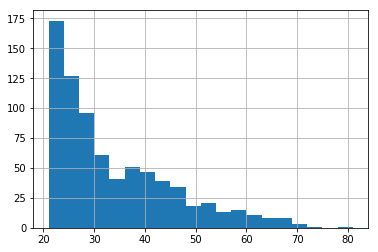

In [50]:
diabetes["Age"].hist(bins=20)

In [51]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20, 30, 40, 50, 60, 70, 80])

In [67]:
feat_cols = [num_preg, plasma_gluc, dias_press, triceps, insulin, bmi, diabetes_pedigree, 
            assigned_group, age_bucket]

In [53]:
x_data = diabetes.drop("Class", axis=1)

In [54]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [55]:
labels = diabetes["Class"]

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)

In [58]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, 
                                                 num_epochs=1000, shuffle=True)

In [59]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_log_step_count_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\Juancho\\AppData\\Local\\Temp\\tmpfr5vw4gl', '_save_summary_steps': 100, '_session_config': None, '_tf_random_seed': 1, '_keep_checkpoint_max': 5}


In [60]:
model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Juancho\AppData\Local\Temp\tmpfr5vw4gl\model.ckpt.
INFO:tensorflow:step = 1, loss = 6.93147
INFO:tensorflow:global_step/sec: 348.789
INFO:tensorflow:step = 101, loss = 6.41299 (0.289 sec)
INFO:tensorflow:global_step/sec: 476.679
INFO:tensorflow:step = 201, loss = 7.82077 (0.211 sec)
INFO:tensorflow:global_step/sec: 550.014
INFO:tensorflow:step = 301, loss = 3.39703 (0.181 sec)
INFO:tensorflow:global_step/sec: 603.026
INFO:tensorflow:step = 401, loss = 6.46308 (0.167 sec)
INFO:tensorflow:global_step/sec: 658.568
INFO:tensorflow:step = 501, loss = 6.01625 (0.152 sec)
INFO:tensorflow:global_step/sec: 690.362
INFO:tensorflow:step = 601, loss = 5.47055 (0.144 sec)
INFO:tensorflow:global_step/sec: 700.017
INFO:tensorflow:step = 701, loss = 4.90988 (0.144 sec)
INFO:tensorflow:global_step/sec: 704.945
INFO:tensorflow:step = 801, loss = 5.97899 (0.141 sec)
INFO:tensorflow:global_step/sec: 676.37
I

In [68]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10,
                                                      num_epochs=1, shuffle=False)

In [69]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-07-23-14:18:50
INFO:tensorflow:Restoring parameters from C:\Users\Juancho\AppData\Local\Temp\tmpfr5vw4gl\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-07-23-14:18:51
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.735931, accuracy_baseline = 0.649351, auc = 0.801481, auc_precision_recall = 0.645589, average_loss = 0.525344, global_step = 1000, label/mean = 0.350649, loss = 5.05643, prediction/mean = 0.366621


In [70]:
results

{'accuracy': 0.73593074,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80148143,
 'auc_precision_recall': 0.6455887,
 'average_loss': 0.52534372,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.0564332,
 'prediction/mean': 0.36662143}

In [71]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10, num_epochs=1,
                                                     shuffle=False)

In [72]:
predictions = model.predict(pred_input_func)

In [73]:
my_pred = list(predictions)

INFO:tensorflow:Restoring parameters from C:\Users\Juancho\AppData\Local\Temp\tmpfr5vw4gl\model.ckpt-1000


In [74]:
my_pred

[{'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.54533821], dtype=float32),
  'logits': array([ 0.18185222], dtype=float32),
  'probabilities': array([ 0.45466188,  0.54533821], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.63502234], dtype=float32),
  'logits': array([ 0.55382395], dtype=float32),
  'probabilities': array([ 0.36497769,  0.63502234], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.37078223], dtype=float32),
  'logits': array([-0.5288626], dtype=float32),
  'probabilities': array([ 0.62921774,  0.37078217], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.3402409], dtype=float32),
  'logits': array([-0.66222084], dtype=float32),
  'probabilities': array([ 0.6597591,  0.3402409], dtype=float32

In [75]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_log_step_count_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\Juancho\\AppData\\Local\\Temp\\tmpctgomrmg', '_save_summary_steps': 100, '_session_config': None, '_tf_random_seed': 1, '_keep_checkpoint_max': 5}


In [76]:
dnn_model.train(input_fn = input_func, steps=1000)

ValueError: Items of feature_columns must be a _DenseColumn. You can wrap a categorical column with an embedding_column or indicator_column. Given: _VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [77]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [78]:
feat_cols = [num_preg, plasma_gluc, dias_press, triceps, insulin, bmi, diabetes_pedigree, 
            embedded_group_col, age_bucket]

In [79]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train, y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [80]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_log_step_count_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\Juancho\\AppData\\Local\\Temp\\tmpwxuarkt9', '_save_summary_steps': 100, '_session_config': None, '_tf_random_seed': 1, '_keep_checkpoint_max': 5}


In [81]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Juancho\AppData\Local\Temp\tmpwxuarkt9\model.ckpt.
INFO:tensorflow:step = 1, loss = 8.62613
INFO:tensorflow:global_step/sec: 365.336
INFO:tensorflow:step = 101, loss = 4.65779 (0.273 sec)
INFO:tensorflow:global_step/sec: 549.387
INFO:tensorflow:step = 201, loss = 2.68289 (0.183 sec)
INFO:tensorflow:global_step/sec: 594.909
INFO:tensorflow:step = 301, loss = 4.52404 (0.168 sec)
INFO:tensorflow:global_step/sec: 553.052
INFO:tensorflow:step = 401, loss = 5.79429 (0.182 sec)
INFO:tensorflow:global_step/sec: 588.839
INFO:tensorflow:step = 501, loss = 4.06306 (0.168 sec)
INFO:tensorflow:global_step/sec: 606.681
INFO:tensorflow:step = 601, loss = 3.28764 (0.165 sec)
INFO:tensorflow:global_step/sec: 680.971
INFO:tensorflow:step = 701, loss = 4.65352 (0.147 sec)
INFO:tensorflow:global_step/sec: 720.16
INFO:tensorflow:step = 801, loss = 5.07014 (0.139 sec)
INFO:tensorflow:global_step/sec: 703.723
I

In [83]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [84]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-07-23-14:23:31
INFO:tensorflow:Restoring parameters from C:\Users\Juancho\AppData\Local\Temp\tmpwxuarkt9\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-07-23-14:23:32
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.735931, accuracy_baseline = 0.649351, auc = 0.813045, auc_precision_recall = 0.66582, average_loss = 0.513655, global_step = 1000, label/mean = 0.350649, loss = 4.94393, prediction/mean = 0.387136


{'accuracy': 0.73593074,
 'accuracy_baseline': 0.64935064,
 'auc': 0.81304526,
 'auc_precision_recall': 0.66581982,
 'average_loss': 0.51365536,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.943933,
 'prediction/mean': 0.38713598}